In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv(r'C:\Users\karthikp\Downloads\Inceptors\Preprocessing files\Loan_processing_train_ctrUa4K.csv')
test = pd.read_csv(r'C:\Users\karthikp\Downloads\Inceptors\Preprocessing files\Loan_processing_test_lAUu6dG.csv')
submission = pd.read_csv(r'C:\Users\karthikp\Downloads\Inceptors\Preprocessing files\Loan_processing_sample_submission_49d68Cx.csv')

In [3]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [4]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.shape

(614, 13)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Analyzing the Train data

In [7]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [9]:
#train.select_dtypes(include = 'object')
#train.select_dtypes(exclude = 'object')

In [10]:
df = train.drop(columns =['Loan_ID'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
df.Gender.replace({'Male':1, 'Female':0}, inplace = True)

In [13]:
df.Married.replace({'No':0,'Yes':1}, inplace = True)

In [14]:
df.Education.replace({'Graduate':1, "Not Graduate":0}, inplace = True)

In [15]:
df.Self_Employed.replace({'No':0, 'Yes':1},inplace = True)

In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [18]:
df.Property_Area.replace({'Semiurban':0,'Urban':1,'Rural':2}, inplace = True)

In [19]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,Y
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,2,N
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,Y
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,Y
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,2,Y
610,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,2,Y
611,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1,Y
612,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1,Y


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [21]:
df1 = test.drop(columns = ['Loan_ID'])

In [22]:
df1.Gender.replace({'Male':1, 'Female':0}, inplace = True)
df1.Married.replace({'No':0,'Yes':1}, inplace = True)
df1.Education.replace({'Graduate':1, "Not Graduate":0}, inplace = True)
df1.Self_Employed.replace({'No':0, 'Yes':1},inplace = True)
df1.Property_Area.replace({'Semiurban':0,'Urban':1,'Rural':2}, inplace = True)

In [23]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,1
1,1.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,1
2,1.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,1
3,1.0,1,2,1,0.0,2340,2546,100.0,360.0,NaN,1
4,1.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,1


In [24]:
df3 = pd.concat([df,df1],ignore_index=True)

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    float64
 1   Married            978 non-null    float64
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    int64  
 4   Self_Employed      926 non-null    float64
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 92.1+ KB


In [26]:
df3.Dependents.isna().sum()

25

In [27]:
df3 = pd.get_dummies(df3,columns = ['Gender','Married'])
df3

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_0.0,Gender_1.0,Married_0.0,Married_1.0
0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,Y,0,1,1,0
1,1,1,0.0,4583,1508.0,128.0,360.0,1.0,2,N,0,1,0,1
2,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,Y,0,1,0,1
3,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,Y,0,1,0,1
4,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,Y,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,3+,0,1.0,4009,1777.0,113.0,360.0,1.0,1,NaN,0,1,0,1
977,0,1,0.0,4158,709.0,115.0,360.0,1.0,1,NaN,0,1,0,1
978,0,1,0.0,3250,1993.0,126.0,360.0,NaN,0,NaN,0,1,1,0
979,0,1,0.0,5000,2393.0,158.0,360.0,1.0,2,NaN,0,1,0,1


In [28]:
df3.isna().sum()

Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
Gender_0.0             0
Gender_1.0             0
Married_0.0            0
Married_1.0            0
dtype: int64

In [29]:
df3['Self_Employed']=df3['Self_Employed'].fillna(0)

In [30]:
df3['LoanAmount'].fillna(int(df['LoanAmount'].mean()), inplace = True)

In [31]:
df3[df3['Loan_Amount_Term'].isnull()]
new_df= df.fillna(method='ffill')
df3['Credit_History'].fillna(method = 'bfill', inplace = True)

In [32]:
x=df3['Loan_Amount_Term'].value_counts()

In [33]:
df3 = pd.get_dummies(df3,columns = ['Dependents'])

In [34]:
df3['Loan_Amount_Term']=df3['Loan_Amount_Term'].fillna(0)
df3['Credit_History'].fillna(method = 'bfill', inplace = True)

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          981 non-null    int64  
 1   Self_Employed      981 non-null    float64
 2   ApplicantIncome    981 non-null    int64  
 3   CoapplicantIncome  981 non-null    float64
 4   LoanAmount         981 non-null    float64
 5   Loan_Amount_Term   981 non-null    float64
 6   Credit_History     981 non-null    float64
 7   Property_Area      981 non-null    int64  
 8   Loan_Status        614 non-null    object 
 9   Gender_0.0         981 non-null    uint8  
 10  Gender_1.0         981 non-null    uint8  
 11  Married_0.0        981 non-null    uint8  
 12  Married_1.0        981 non-null    uint8  
 13  Dependents_0       981 non-null    uint8  
 14  Dependents_1       981 non-null    uint8  
 15  Dependents_2       981 non-null    uint8  
 16  Dependents_3+      981 non

In [87]:
train_preprc = df3[df3['Loan_Status'].notna()]
test_preprc = df3[df3['Loan_Status'].isna()]

In [88]:
train_preprc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          614 non-null    int64  
 1   Self_Employed      614 non-null    float64
 2   ApplicantIncome    614 non-null    int64  
 3   CoapplicantIncome  614 non-null    float64
 4   LoanAmount         614 non-null    float64
 5   Loan_Amount_Term   614 non-null    float64
 6   Credit_History     614 non-null    float64
 7   Property_Area      614 non-null    int64  
 8   Loan_Status        614 non-null    object 
 9   Gender_0.0         614 non-null    uint8  
 10  Gender_1.0         614 non-null    uint8  
 11  Married_0.0        614 non-null    uint8  
 12  Married_1.0        614 non-null    uint8  
 13  Dependents_0       614 non-null    uint8  
 14  Dependents_1       614 non-null    uint8  
 15  Dependents_2       614 non-null    uint8  
 16  Dependents_3+      614 non

In [38]:
test_preprc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 614 to 980
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          367 non-null    int64  
 1   Self_Employed      367 non-null    float64
 2   ApplicantIncome    367 non-null    int64  
 3   CoapplicantIncome  367 non-null    float64
 4   LoanAmount         367 non-null    float64
 5   Loan_Amount_Term   367 non-null    float64
 6   Credit_History     367 non-null    float64
 7   Property_Area      367 non-null    int64  
 8   Loan_Status        0 non-null      object 
 9   Gender_0.0         367 non-null    uint8  
 10  Gender_1.0         367 non-null    uint8  
 11  Married_0.0        367 non-null    uint8  
 12  Married_1.0        367 non-null    uint8  
 13  Dependents_0       367 non-null    uint8  
 14  Dependents_1       367 non-null    uint8  
 15  Dependents_2       367 non-null    uint8  
 16  Dependents_3+      367 n

In [39]:
train_preprc.to_csv('train_preprc.csv',index=False)
test_preprc.to_csv('test_preprc.csv', index=False)

In [40]:
pptrain = pd.read_csv('train_preprc.csv')
pptest = pd.read_csv('test_preprc.csv')

In [41]:
pptrain.shape, pptest.shape

((614, 17), (367, 17))

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

In [43]:
pptrain

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_0.0,Gender_1.0,Married_0.0,Married_1.0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0.0,5849,0.0,146.0,360.0,1.0,1,Y,0,1,1,0,1,0,0,0
1,1,0.0,4583,1508.0,128.0,360.0,1.0,2,N,0,1,0,1,0,1,0,0
2,1,1.0,3000,0.0,66.0,360.0,1.0,1,Y,0,1,0,1,1,0,0,0
3,0,0.0,2583,2358.0,120.0,360.0,1.0,1,Y,0,1,0,1,1,0,0,0
4,1,0.0,6000,0.0,141.0,360.0,1.0,1,Y,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0.0,2900,0.0,71.0,360.0,1.0,2,Y,1,0,1,0,1,0,0,0
610,1,0.0,4106,0.0,40.0,180.0,1.0,2,Y,0,1,0,1,0,0,0,1
611,1,0.0,8072,240.0,253.0,360.0,1.0,1,Y,0,1,0,1,0,1,0,0
612,1,0.0,7583,0.0,187.0,360.0,1.0,1,Y,0,1,0,1,0,0,1,0


In [44]:
x = pptrain.drop(columns = ['Loan_Status'])
y = pptrain['Loan_Status']

In [45]:
x.shape, y.shape

((614, 16), (614,))

In [46]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [47]:
x_train.shape, y_train.shape

((429, 16), (429,))

In [68]:
model = GaussianNB()

In [69]:
model.fit(x_train, y_train)

GaussianNB()

In [70]:
y_pred = model.predict(x_test)

In [71]:
acc_score = accuracy_score(y_pred, y_test)

In [72]:
print ('The accuracy score of NB model is: ', acc_score)

The accuracy score of NB model is:  0.7567567567567568


In [73]:
confusion_matrix(y_pred, y_test)

array([[ 29,  13],
       [ 32, 111]], dtype=int64)

In [63]:
DT_model = DecisionTreeClassifier(criterion = 'entropy')

In [64]:
DT_model.fit (x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
y_pred1 = DT_model.predict(x_test)

In [67]:
accuracy_score( y_pred1, y_test)

0.6594594594594595

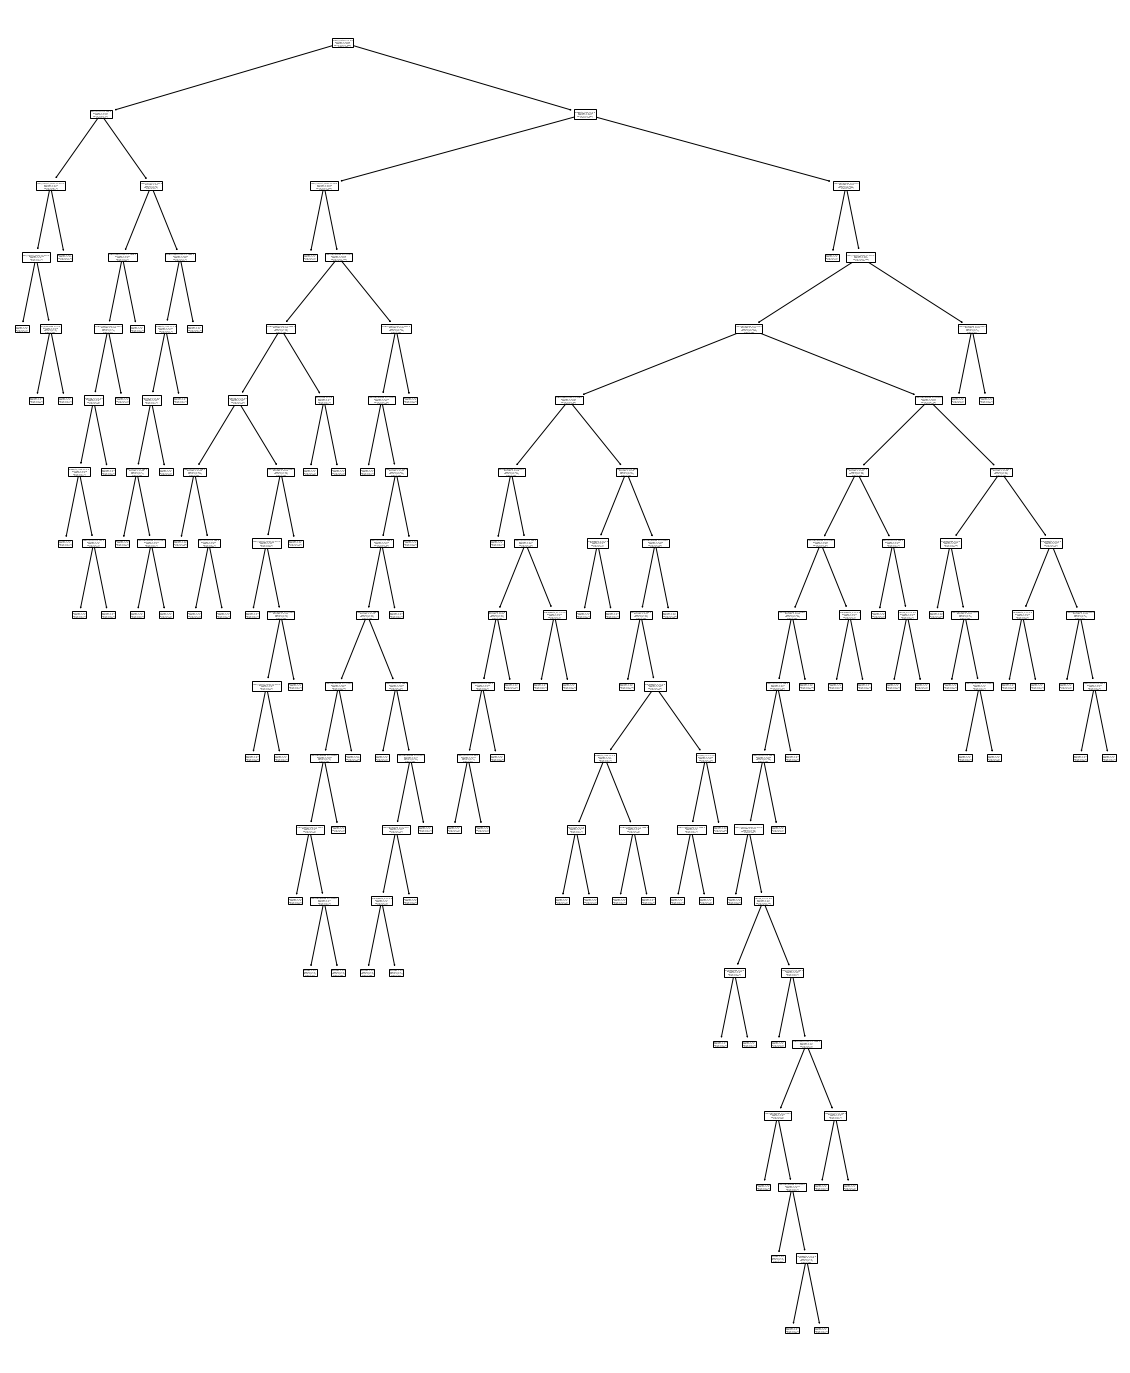

In [86]:
fig = plt.figure(figsize=(20,25))
_ = tree.plot_tree(DT_model, feature_names = x.columns, class_names = ['No','Yes'],filled= False)